### Read omnibaord data

In [4]:
import pandas as pd
import pymongo
import numpy as np
from collections import OrderedDict
import json
import matplotlib.pyplot as plt

from bson import ObjectId

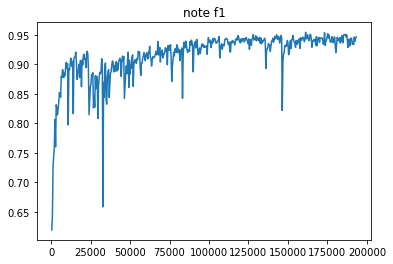

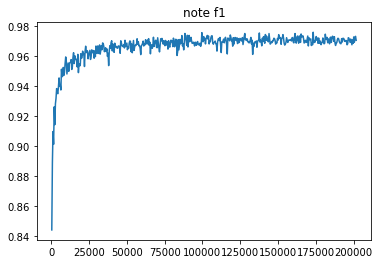

In [37]:

 
myclient = pymongo.MongoClient("mongodb://10.177.55.66:7000/")
mydb = myclient["piano_transcription"]
runs = mydb['runs']

q = {'_id':{'$in':[9,11,]}} #  
res = runs.find(q)
for i in res:
    metrics_info = i['info']['metrics']
    # print(metrics_info)
    for info in metrics_info:
        name = info['name']
        _id = info['id']
        if(name.find('/note/f1') >= 0):
            # print(_id)
            metric = mydb['metrics'].find({'_id': ObjectId(_id)})
            print(metric)
            for item in metric:
                steps = item['steps']
                values = item['values']
                plt.figure()
                plt.title('note f1')
                plt.plot(steps, values)
            

### Read tensorboard data

In [3]:
from tensorboard.backend.event_processing import event_accumulator
import argparse
import pandas as pd
from tqdm import tqdm


def save_tensorboard_log(logdir, out_path):

    # load log data
    # parser = argparse.ArgumentParser(description='Export tensorboard data')
    # parser.add_argument('--in-path', type=str, required=True, help='Tensorboard event files or a single tensorboard '
    #                                                                'file location')
    # parser.add_argument('--ex-path', type=str, required=True, help='location to save the exported data')

    # args = parser.parse_args()
    event_data = event_accumulator.EventAccumulator(logdir)  # a python interface for loading Event data
    event_data.Reload()  # synchronously loads all of the data written so far b
    # print(event_data.Tags())  # print all tags
    keys = event_data.scalars.Keys()  # get all tags,save in a list
    # print(keys)
    df = pd.DataFrame(columns=keys[1:])  # my first column is training loss per iteration, so I abandon it
    for key in tqdm(keys):
        # print(key)
        if key != 'train/total_loss_iter':  # Other attributes' timestamp is epoch.Ignore it for the format of csv file
            df[key] = pd.DataFrame(event_data.Scalars(key)).value

    df.to_csv(out_path)

    print("Tensorboard data exported successfully")


save_tensorboard_log('results/1.proposed', 'results/1.csv')
save_tensorboard_log('results/2.FB-RNN -> RNN', 'results/2.csv')
save_tensorboard_log('results/3.without FB-RNN', 'results/3.csv')
save_tensorboard_log('results/4.without HD-Conv', 'results/4.csv')


In [2]:
import pandas as pd

df = pd.read_csv('results/1.csv')
df.head(10)

,Unnamed: 0,loss/onset,loss/frame,loss/velocity,validation/loss/onset,validation/loss/frame,validation/loss/velocity,validation/metric/onsets/recall,validation/metric/onsets/precision,validation/metric/onsets/f1,...,validation/metric/frame/false_alarm_error,validation/metric/frame/total_error,validation/metric/frame/chroma_precision,validation/metric/frame/chroma_recall,validation/metric/frame/chroma_accuracy,validation/metric/frame/chroma_substitution_error,validation/metric/frame/chroma_miss_error,validation/metric/frame/chroma_false_alarm_error,validation/metric/frame/chroma_total_error,loss
0,0,0.268638,0.308180,0.032076,0.008284,0.074206,0.014436,0.767203,0.953677,0.844923,...,0.036740,0.466820,0.918556,0.581094,0.548863,0.020190,0.398716,0.036740,0.455646,0.608893
1,1,0.080871,0.111466,0.015807,0.006898,0.047356,0.012608,0.840695,0.953578,0.890544,...,0.081822,0.295526,0.886598,0.796719,0.722256,0.026054,0.177226,0.081822,0.285102,0.208144
2,2,0.054908,0.102994,0.015604,0.006269,0.054061,0.010499,0.874992,0.957288,0.911043,...,0.194774,0.319010,0.811408,0.887262,0.733916,0.027195,0.085543,0.194774,0.307512,0.173506
3,3,0.030377,0.087440,0.019488,0.006738,0.052645,0.008525,0.844257,0.979765,0.902957,...,0.063813,0.305504,0.900512,0.766156,0.704894,0.025615,0.208229,0.063813,0.297657,0.137305
4,4,0.032625,0.129058,0.021349,0.005595,0.053290,0.006898,0.894508,0.966756,0.927361,...,0.063825,0.250346,0.911773,0.820888,0.760281,0.019709,0.159403,0.063825,0.242937,0.183032
5,5,0.034170,0.070389,0.015931,0.005577,0.045678,0.006388,0.857272,0.987322,0.914920,...,0.034377,0.297024,0.940210,0.743026,0.708961,0.014596,0.242378,0.034377,0.291351,0.120490
6,6,0.020457,0.045347,0.009283,0.005735,0.040127,0.006549,0.913917,0.948086,0.929455,...,0.060989,0.240433,0.914845,0.826713,0.767438,0.018520,0.154767,0.060989,0.234276,0.075088
7,7,0.022836,0.054996,0.021102,0.005271,0.051838,0.008163,0.891445,0.983334,0.933074,...,0.181010,0.311745,0.835684,0.876578,0.740568,0.018773,0.104649,0.181010,0.304432,0.098934
8,8,0.028980,0.091875,0.020420,0.004887,0.038430,0.006308,0.901611,0.984076,0.939130,...,0.093152,0.219828,0.894560,0.878068,0.794934,0.016201,0.105731,0.093152,0.215084,0.141275
9,9,0.021598,0.069388,0.020257,0.005678,0.035446,0.006486,0.898831,0.983650,0.937283,...,0.070669,0.219707,0.911546,0.856770,0.791627,0.015504,0.127726,0.070669,0.213899,0.111243


### Evluate


In [1]:
checkpoint_path = '/home/fd-lamt-02/vvx/piano_transcription_0412/runs/transcriber-220427-092150_conversions/model-100000.pt'

In [3]:
import os
pwd = '/home/fd-lamt-02/vvx/piano_transcription_0412/runs/transcriber-220427-092150_conversions/56/src'

os.chdir(pwd)

In [5]:
!pwd

/home/fd-lamt-02/2T/vvx/piano_transcription_0412/runs/transcriber-220427-092150_conversions/56/src


In [24]:
# %%capture capt
!python evaluate.py ../../model-100000.pt MAESTRO test

sampling rate = 16000. Please make sure the sampling rate is correct in order toget a valid freq range
STFT kernels created, time used = 0.0107 seconds
CQT kernels created, time used = 0.3121 seconds
Loading 1 group of MAESTRO at /home/fd-lamt-02/2T/vvx/piano_transcription/data/maestro-v3.0.0
Loading group test: 100%|█████████████████| 125/125 [00:00<00:00, 208630.32it/s]
HARPIST(
  (amplitude_to_db): AmplitudeToDB(), 0 params
  (onset_dict): ModuleDict(
    (onset_trunk): CNNTrunk(
      (block_1): Sequential(
        (0): Conv2d(2, 16, kernel_size=(5, 5), stride=(1, 1), padding=same), 816 params
        (1): ReLU(), 0 params
        (2): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False), 0 params
      ), 816 params
      (block_2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=same), 6,416 params
        (1): ReLU(), 0 params
        (2): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_st

In [9]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [25]:
# capt.stdout

In [26]:
# !ls -hl /home/fd-lamt-02/vvx/piano_transcription_0412/runs/transcriber-220427-092150_conversions/model-100000-test | grep '.h5'

In [31]:
import pandas as pd
df = pd.read_csv('/home/fd-lamt-02/vvx/piano_transcription_0412/runs/transcriber-220427-092150_conversions/model-100000_evaluate/MAESTRO/test/metrics_result.csv')
df.head()

,Unnamed: 0,on/recall,on/precision,on/f1,note/precision,note/recall,note/f1,note/overlap,note-off/precision,note-off/recall,...,frame/false_alarm_error,frame/total_error,frame/chroma_precision,frame/chroma_recall,frame/chroma_accuracy,frame/chroma_substitution_error,frame/chroma_miss_error,frame/chroma_false_alarm_error,frame/chroma_total_error,path
0,0,tensor(0.9263),tensor(0.9451),tensor(0.9356),0.941720,0.925170,0.933371,0.875933,0.809002,0.794785,...,0.062937,0.153838,0.920062,0.912560,0.845522,0.016349,0.071090,0.062937,0.150376,MIDI-Unprocessed_SMF_16_R1_2004_01-08_ORIG_MID...
1,1,tensor(0.9479),tensor(0.9649),tensor(0.9563),0.964286,0.947368,0.955752,0.868927,0.803571,0.789474,...,0.053027,0.152347,0.929556,0.904802,0.846743,0.015541,0.079657,0.053027,0.148225,MIDI-Unprocessed_SMF_16_R1_2004_01-08_ORIG_MID...
2,2,tensor(0.8859),tensor(0.9428),tensor(0.9134),0.938425,0.881758,0.909209,0.709692,0.728466,0.684477,...,0.071358,0.233105,0.906064,0.846452,0.778164,0.016398,0.137150,0.071358,0.224906,MIDI-Unprocessed_SMF_16_R1_2004_01-08_ORIG_MID...
3,3,tensor(0.9909),tensor(0.9850),tensor(0.9879),0.985034,0.990876,0.987946,0.787326,0.874376,0.879562,...,0.031050,0.171994,0.957073,0.860998,0.828985,0.007567,0.131434,0.031050,0.170052,MIDI-Unprocessed_SMF_17_R1_2004_01-02_ORIG_MID...
4,4,tensor(0.9557),tensor(0.9638),tensor(0.9597),0.963298,0.955169,0.959216,0.737814,0.717553,0.711498,...,0.096991,0.220670,0.885373,0.877172,0.787715,0.016574,0.106254,0.096991,0.219819,MIDI-Unprocessed_SMF_17_R1_2004_03-06_ORIG_MID...


In [39]:
# df.columns

In [38]:
df_1 = df[['note/precision','note/recall', 'note/f1', 'frame/precision', 'frame/recall', 'frame/f1', 'path']]
(df_1.head()*100).round(1)

,note/precision,note/recall,note/f1,frame/precision,frame/recall,frame/f1,path
0,94.2,92.5,93.3,91.7,90.9,91.3,MIDI-Unprocessed_SMF_16_R1_2004_01-08_ORIG_MID...
1,96.4,94.7,95.6,92.5,90.1,91.3,MIDI-Unprocessed_SMF_16_R1_2004_01-08_ORIG_MID...
2,93.8,88.2,90.9,89.7,83.8,86.7,MIDI-Unprocessed_SMF_16_R1_2004_01-08_ORIG_MID...
3,98.5,99.1,98.8,95.5,85.9,90.4,MIDI-Unprocessed_SMF_17_R1_2004_01-02_ORIG_MID...
4,96.3,95.5,95.9,88.5,87.6,88.0,MIDI-Unprocessed_SMF_17_R1_2004_03-06_ORIG_MID...


### Ablation Study
#### 1.Proposed

In [40]:
import os
import pandas as pd
import numpy as np

In [6]:
# proposed
pwd = '/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/1.proposed/11/src'
os.chdir(pwd)

In [ ]:
# 保存每个wav的结果到 csv
# loss.item
# offset loss 的有无
# unexpected keyword argument 'device'

# to_cqt.to(device)
# frame和vel的upsample  onset_pred.size()[-2:]
# train 和 eval时， self.frame_num没对上，forward()，run_on_batch()


In [7]:
# !python evaluate.py ../../model-200000.pt MAESTRO test
!python evaluate.py ../../model-200000.pt MAPS 

sampling rate = 16000. Please make sure the sampling rate is correct in order toget a valid freq range
STFT kernels created, time used = 0.0100 seconds
CQT kernels created, time used = 0.2440 seconds
Loading 2 groups of MAPS at data/MAPS
Loading group ENSTDkAm: 0it [00:00, ?it/s]
Loading group ENSTDkCl: 0it [00:00, ?it/s]
OnsetsAndFrames(
  (amplitude_to_db): AmplitudeToDB(), 0 params
  (onset_dict): ModuleDict(
    (onset_trunk): HarmonicDilatedConv(
      (block_1): Sequential(
        (0): Conv2d(2, 16, kernel_size=(5, 5), stride=(1, 1), padding=same), 816 params
        (1): ReLU(), 0 params
        (2): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False), 0 params
      ), 816 params
      (block_2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=same), 6,416 params
        (1): ReLU(), 0 params
        (2): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False), 0 params
      ), 6,

In [11]:
df_1 = pd.read_csv('/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/1.proposed/model-200000_evaluate/MAESTRO/test/metrics_result.csv')
df_1 = df_1[['note/precision','note/recall', 'note/f1', 'frame/precision', 'frame/recall', 'frame/f1', 'path']]
(df_1.head()*100).round(2)
note_f1 = np.mean(df_1['note/f1'])
df_1.mean(axis=0)
# print(note_f1)

/home/fd-lamt-02/anaconda3/envs/vvx-torch/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


note/precision     0.984891
note/recall        0.952464
note/f1            0.968238
frame/precision    0.935067
frame/recall       0.914610
frame/f1           0.924332
dtype: float64

#### 2.FB-RNN -> RNN

In [54]:
# proposed
pwd = '/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/2.FB-RNN -> RNN/33/src'
#
os.chdir(pwd)
!pwd

/home/fd-lamt-02/2T/vvx/piano_transcription_0412/runs/transcriber-220422-220150_wins/33/src


In [73]:

# !python evaluate.py ../../model-200000.pt MAESTRO test

In [12]:
df_2 = pd.read_csv('/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/2.FB-RNN -> RNN/model-200000_evaluate/MAESTRO/test/metrics_result.csv')
df_2 = df_2[['note/precision','note/recall', 'note/f1', 'frame/precision', 'frame/recall', 'frame/f1', 'path']]
print(len(df_2))
(df_2.head()*100).round(2)
df_2.mean(axis=0)

125


/home/fd-lamt-02/anaconda3/envs/vvx-torch/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


note/precision     0.978972
note/recall        0.940647
note/f1            0.959177
frame/precision    0.947088
frame/recall       0.840605
frame/f1           0.889943
dtype: float64

#### 3.without FB-RNN

In [74]:
pwd = "/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/3.without FB-RNN/36/src"
os.chdir(pwd)
!pwd

/home/fd-lamt-02/2T/vvx/piano_transcription_0412/runs/transcriber-220422-023304_HD-Conv[onset_frame_vel_sep_0413,no_LSTM,weighted_loss_2,LSTM,maestro-v3]/36/src


In [78]:
# 
!python evaluate.py ../../model-200000.pt MAESTRO test

sampling rate = 16000. Please make sure the sampling rate is correct in order toget a valid freq range
STFT kernels created, time used = 0.0115 seconds
CQT kernels created, time used = 0.2948 seconds
Loading 1 group of MAESTRO at /home/fd-lamt-02/2T/vvx/piano_transcription/data/maestro-v3.0.0
Loading group test: 100%|█████████████████| 125/125 [00:00<00:00, 213646.29it/s]
OnsetsAndFrames(
  (amplitude_to_db): AmplitudeToDB(), 0 params
  (onset_dict): ModuleDict(
    (onset_trunk): HarmonicDilatedConv(
      (block_1): Sequential(
        (0): Conv2d(2, 16, kernel_size=(5, 5), stride=(1, 1), padding=same), 816 params
        (1): ReLU(), 0 params
        (2): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False), 0 params
      ), 816 params
      (block_2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=same), 6,416 params
        (1): ReLU(), 0 params
        (2): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=Fals

In [79]:
df_3 = pd.read_csv('/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/3.without FB-RNN/model-200000_evaluate/MAESTRO/test/metrics_result.csv')
df_3 = df_3[['note/precision','note/recall', 'note/f1', 'frame/precision', 'frame/recall', 'frame/f1', 'path']]
print(len(df_3))
(df_3.tail()*100).round(2)

125


,note/precision,note/recall,note/f1,frame/precision,frame/recall,frame/f1,path
120,98.63,94.46,96.50,97.90,80.49,88.34,MIDI-Unprocessed_071_PIANO071_MID--AUDIO-split...
121,98.20,94.70,96.42,96.27,78.43,86.44,MIDI-Unprocessed_078_PIANO078_MID--AUDIO-split...
122,96.96,89.67,93.17,96.56,82.99,89.26,MIDI-Unprocessed_079_PIANO079_MID--AUDIO-split...
123,96.79,90.66,93.62,97.35,73.47,83.74,MIDI-Unprocessed_079_PIANO079_MID--AUDIO-split...
124,96.17,89.29,92.60,95.47,80.45,87.32,MIDI-Unprocessed_080_PIANO080_MID--AUDIO-split...


#### 4.without HD-Conv

In [1]:
pwd = '/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/4.without HD-Conv/34/src'
os.chdir(pwd)
!pwd

/home/fd-lamt-02/2T/vvx/piano_transcription_0412/runs/transcriber-220423-004553_diagrams/34/src


In [ ]:
# 保存每个wav的结果到 csv
# loss.item
# offset loss 的有无
# unexpected keyword argument 'device'

# to_cqt.to(device)
# frame和vel的upsample  onset_pred.size()[-2:]
# train 和 eval时， self.frame_num没对上，forward()，run_on_batch()

In [2]:
!python evaluate.py ../../model-200000.pt MAESTRO test

sampling rate = 16000. Please make sure the sampling rate is correct in order toget a valid freq range
STFT kernels created, time used = 0.0176 seconds
CQT kernels created, time used = 0.3128 seconds
Loading 1 group of MAESTRO at /home/fd-lamt-02/2T/vvx/piano_transcription/data/maestro-v3.0.0
Loading group test: 100%|█████████████████| 125/125 [00:00<00:00, 217908.56it/s]
OnsetsAndFrames(
  (amplitude_to_db): AmplitudeToDB(), 0 params
  (onset_dict): ModuleDict(
    (onset_trunk): CNNTrunk(
      (block_1): Sequential(
        (0): Conv2d(2, 16, kernel_size=(5, 5), stride=(1, 1), padding=same), 816 params
        (1): ReLU(), 0 params
        (2): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False), 0 params
      ), 816 params
      (block_2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=same), 6,416 params
        (1): ReLU(), 0 params
        (2): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_ru

In [5]:
df_4 = pd.read_csv('/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/3.without FB-RNN/model-200000_evaluate/MAESTRO/test/metrics_result.csv')
df_4 = df_4[['note/precision','note/recall', 'note/f1', 'frame/precision', 'frame/recall', 'frame/f1', 'path']]
print(len(df_4))
(df_4.tail()*100).round(2)

125


,note/precision,note/recall,note/f1,frame/precision,frame/recall,frame/f1,path
120,98.63,94.46,96.50,97.90,80.49,88.34,MIDI-Unprocessed_071_PIANO071_MID--AUDIO-split...
121,98.20,94.70,96.42,96.27,78.43,86.44,MIDI-Unprocessed_078_PIANO078_MID--AUDIO-split...
122,96.96,89.67,93.17,96.56,82.99,89.26,MIDI-Unprocessed_079_PIANO079_MID--AUDIO-split...
123,96.79,90.66,93.62,97.35,73.47,83.74,MIDI-Unprocessed_079_PIANO079_MID--AUDIO-split...
124,96.17,89.29,92.60,95.47,80.45,87.32,MIDI-Unprocessed_080_PIANO080_MID--AUDIO-split...


#### Compare 1 & 2